# Домашнее задание № 2

## по дисциплине: Теория вероятностей и математическая статистика

## Тема: Дискретные случайные величины. Закон распределения вероятностей.  Биномиальный закон распределения. Распределение Пуассона

### выполнил: Евгений Кириллов

__Задачи 1 и 2__


Контрольная работа состоит из пяти вопросов. На каждый вопрос приведено четыре варианта ответа, один из которых правильный. Случайная величина X задаёт число правильных ответов при простом угадывании. Найдите математическое ожидание данной случайной величины. Найдите дисперсию случайной величины X.

Подсказка: постройте закон распределения случайной величины X.

In [1]:
import numpy as np
import pandas as pd

для решения нам понадобится формула Бернулли:

$$P(X = k) = C_n^k p^k (1 - p)^{n - k}$$

создадим соответсвующую функцию:

In [2]:
def bernulli(n, k, p):
    
    def combinations(n, k):
        return np.math.factorial(n) // (np.math.factorial(k) * np.math.factorial(n - k))
    
    return combinations(n, k) * (p ** k) * ((1 - p) ** (n - k))

проверим, что сумма всех вероятностей равна 1:

In [3]:
sum(bernulli(5, k, 1 / 4) for k in range(0, 6))

1.0

In [4]:
distribution = pd.Series([bernulli(5, _, 1 / 4) for _ in range(0, 6)], index=[_ for _ in range(0, 6)])
distribution

0    0.237305
1    0.395508
2    0.263672
3    0.087891
4    0.014648
5    0.000977
dtype: float64

построим график распределения вероятностей случайной величины X:

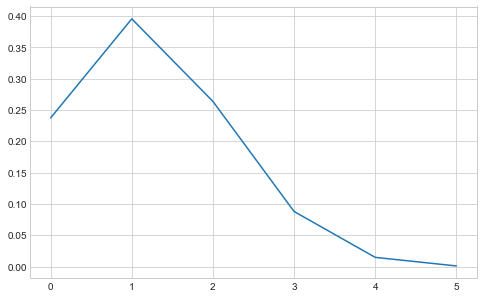

In [5]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8, 5))
plt.style.use('seaborn-whitegrid')
# %config InlineBackend.figure_formats = ['svg']
plt.plot(distribution)
plt.show()

посчитаем математическое ожидание:

$$M(X) = \displaystyle\sum_i p_i x_i = p_1 x_1 + p_2 x_2 + \dots$$

In [6]:
x_values = distribution.index
x_probabilities = distribution.values

expectation = sum((x_values * x_probabilities))
expectation

1.25

посчитаем дисперсию:

$$D(X) = M \left( (X - M(X))^2 \right).$$

In [7]:
dispersion = sum(((x_values - expectation) ** 2) * x_probabilities)
dispersion

0.9375

__Задача 3__


Пользователь получает в среднем 10 писем со спамом на свой почтовый ящик за сутки. Найти число N, такое, что с вероятностью 0.95 пользователь получит не более N писем со спамом за текущий день.

для решения нам понадобится формула Пуассона:

$$P(X = k) = \dfrac{\lambda^k e^{-\lambda}}{k!}$$

создадим соответсвующую функцию:

In [8]:
import math

In [9]:
def poisson(lambda_, k):
    return ((lambda_ ** k) * (math.e ** ((-1) * lambda_))) / np.math.factorial(k)

решим задачу путём увеличения числа N до получения требуемой суммы вероятностей:

In [10]:
n = 0
probability = 0
while True:
    probability += poisson(10, n)
    print(n, probability)
    if probability >= 0.95:
        break
    n += 1

0 4.5399929762484875e-05
1 0.0004993992273873337
2 0.002769395715511577
3 0.010336050675925723
4 0.02925268807696109
5 0.06708596287903182
6 0.13014142088248304
7 0.22022064660169904
8 0.33281967875071905
9 0.4579297144718524
10 0.5830397501929857
11 0.6967761463031069
12 0.7915564763948746
13 0.8644644226193112
14 0.9165415270653374
15 0.9512595966960216


#### ответ: 15

__Задача 4__


Производятся выстрелы по мишени. Вероятность попадания в мишень при одном выстреле равна 0.01. Сколько выстрелов нужно сделать чтобы быть уверенным с вероятностью 0.9, что хотя бы 6 раз будет совершено попадание?

Подсказка: 1) "Вероятность попасть k раз при n выстрелах" - на какое распределение это похоже? 2) А если нам нужна вероятность P(X >= k), а не P(X = k)? 3) Здесь предстоит немножко покодить.

# ДАННОЕ РЕШЕНИЕ - НЕПРАВИЛЬНОЕ - СМ. ОТВЕТЫ НА СЛЕДУЮЩЕМ УРОКЕ

для того чтобы вероятность наступления 6-ти событий была равна 0.9, надо, чтобы вероятность каждого отдельного события была равна $\sqrt[6]{0.9}$, т.к.:

$$x^6=0.9$$

вычислим вероятность каждого отдельного события:

In [11]:
pow(0.9, (1 / 6))

0.9825931938526898

проверим:

In [12]:
0.9825931938526898 ** 6

0.8999999999999999

найдём количество выстрелов для достижения вероятности одного попадания с точностью 0.9825931938526898

распределение в данном случае будет геометрическим:

$$P(X = k) = (1 - p)^{k-1} \cdot p$$

In [804]:
def geometrical(k, p):
    return ((1 - p) ** (k - 1)) * p

In [805]:
k = 1
probability = 0
while True:
    probability += geometrical(k, 0.01)
    print(k, probability)
    if probability >= 0.9825931938526898:
        break
    k += 1

1 0.01
2 0.0199
3 0.029701
4 0.03940399
5 0.0490099501
6 0.058519850599
7 0.06793465209301
8 0.07725530557207991
9 0.0864827525163591
10 0.09561792499119551
11 0.10466174574128355
12 0.11361512828387071
13 0.12247897700103201
14 0.1312541872310217
15 0.13994164535871148
16 0.14854222890512436
17 0.15705680661607313
18 0.1654862385499124
19 0.17383137616441327
20 0.18209306240276912
21 0.19027213177874144
22 0.19836941046095402
23 0.20638571635634448
24 0.21432185919278104
25 0.22217864060085324
26 0.2299568541948447
27 0.23765728565289626
28 0.2452807127963673
29 0.25282790566840363
30 0.26029962661171957
31 0.26769663034560237
32 0.27501966404214634
33 0.28226946740172487
34 0.28944677272770764
35 0.29655230500043056
36 0.30358678195042627
37 0.310550914130922
38 0.31744540498961277
39 0.32427095093971664
40 0.33102824143031945
41 0.33771795901601626
42 0.3443407794258561
43 0.35089737163159757
44 0.3573883979152816
45 0.3638145139361288
46 0.3701763687967675
47 0.3764746051087998
48 

404 выстрелов надо для того, чтобы достичь вероятности попадания >= 0.9825931938526898

соответственно, 404 * 6 = 2424 выстрелов надо для того, чтобы достичь вероятности >= 0.9 для 6 попаданий

#### ответ: 2424